# Analyse survey

## Imports

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 16 13:02:17 2018

@author: macchini
"""

import os,sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import my_plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import utils

from numpy.random import seed
from numpy.random import randn
from scipy.stats import kruskal

from collections import Counter
from matplotlib.pylab import savefig

In [2]:
# plot settings

lw = 1.5

fs = 13

params = {
    'axes.labelsize': fs,
    'font.size': fs,
    'legend.fontsize': fs,
    'xtick.labelsize': fs,
    'ytick.labelsize': fs,
    'text.usetex': False,
    'figure.figsize': [4, 4],
    'boxplot.boxprops.linewidth' : lw,
    'boxplot.whiskerprops.linewidth' : lw,
    'boxplot.capprops.linewidth' : lw,
    'boxplot.medianprops.linewidth' : lw,
    'text.usetex' : True,
    'font.family' : 'serif',

   }
mpl.rcParams.update(params)

## Load file and create dataframe

In [3]:
folder = './Data'

csv = 'Bidirectional Interface - haptics.csv'

In [4]:
answers_df = pd.read_csv(os.path.join(folder, csv))

answers_df_sim = answers_df.iloc[[0,1,2,3,4,5,6,11,12]]

answers_df_hw = answers_df.iloc[[7,8,9,10]]
answers_df_sim

,Horodateur,Age,Gender,How experienced are you with the use of remote controllers?,How experienced are you with the use of remote controllers for controlling drones?,Which interface was easier to use for the task?,How useful was the haptic inteface?,Which interface did you prefer?,Why?,Please give your personal feedback/impressions
0,2019/08/13 10:13:17 AM UTC+2,24,Male,9,9,Wearable,10,Werable,Gives a sense of depth,The vibrating gloves are comfortable to use an...
1,2019/08/13 10:54:21 AM UTC+2,27,Male,5,2,Wearable,9,Werable,It was nice to have the physical motion associ...,It would be nice to not have the vibration by ...
2,2019/08/13 12:00:14 PM UTC+2,32,Female,3,3,Wearable,9,Werable,it was easier to control and it felt more simi...,"the vibration was very useful, if the behind w..."
3,2019/08/13 3:50:38 PM UTC+2,27,Female,10,1,Wearable,10,Werable,due to vibrations it's possible to align not o...,Tasks were interesting and getting more challe...
4,2019/08/13 5:22:01 PM UTC+2,25,Female,3,1,Wearable,9,Werable,Because the vibrations help in knowing how clo...,I believe it is hard to measure the depth most...
5,2019/08/13 6:37:02 PM UTC+2,29,Male,10,8,Wearable,10,Werable,The wearable interface feels more natural and ...,It was hard to accomplish the tasks with the r...
6,2019/08/13 6:39:57 PM UTC+2,21,Male,10,1,Wearable,10,Werable,Physical feedback compensated the lack of visi...,The haptic interface was really good. It could...
11,2019/08/28 1:38:23 PM UTC+2,31,Male,5,1,Wearable,6,Werable,having a feedback,The place of vibrator for forward direction wa...
12,2019/08/28 3:48:56 PM UTC+2,24,Male,10,3,Wearable,9,Werable,Wearable control is more fun and haptic interf...,Even if haptic interface helps a lot to feel d...


## Separate questions

In [5]:
data_sim = {}
data_hw = {}


age = 'Age'
gender = 'Gender'
experience_controller = 'How experienced are you with the use of remote controllers?'
experience_controller_drone = 'How experienced are you with the use of remote controllers for controlling drones?'
easier = 'Which interface was easier to use for the task?'
haptics = 'How useful was the haptic inteface?'
prefered = 'Which interface did you prefer?'
why = 'Why?'
feedback = 'Please give your personal feedback/impressions'

questions = [age, gender, experience_controller, experience_controller_drone, easier, haptics, prefered, why, feedback]

for q in questions:
    data_sim[q] = answers_df_sim[q].values
for q in questions:
    data_hw[q] = answers_df_hw[q].values

## Compute mean and average

In [6]:
def compute_stats(data):

    stats = {}

    mean_index = 0
    std_index = 1

    for q in [age, experience_controller, experience_controller_drone]:
        stats[q] = [0, 0]
        stats[q][mean_index] = np.mean(data[q])
        stats[q][std_index] = np.std(data[q])

    print(stats)
    
    return stats

stats_sim = compute_stats(data_sim)
stats_hw = compute_stats(data_hw)

data_hw_q = data_hw

{'Age': [26.666666666666668, 3.366501646120693], 'How experienced are you with the use of remote controllers?': [7.222222222222222, 2.9731307022799225], 'How experienced are you with the use of remote controllers for controlling drones?': [3.2222222222222223, 2.9355210696939795]}
{'Age': [25.5, 2.5], 'How experienced are you with the use of remote controllers?': [7.5, 0.8660254037844386], 'How experienced are you with the use of remote controllers for controlling drones?': [5.25, 2.5860201081971503]}


## Results

Stats (similarly for stats_hw for the hardware experiments) is a nested dictionnary containing the mean and std for each question of the survey, separated depending on the interface (remote or motion) and run (first or last)

data (similarly data_hw) can be used to create boxplot for the distribution of answers.

[10, 10, 10, 10, 9, 9, 9, 9, 6]
9.11111111111111
1.1967032904743342


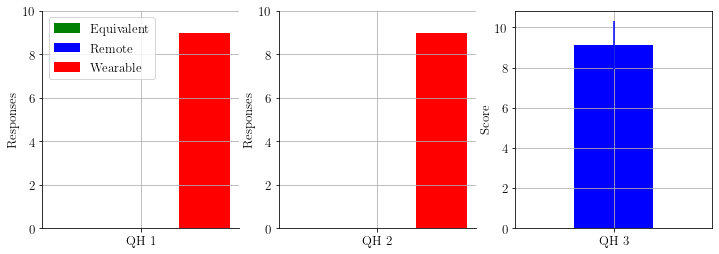

In [7]:
resp_data = {}

resp_data[easier] = Counter(data_sim[easier])
resp_data[prefered] = Counter(data_sim[prefered])

resp_data[easier]['Equivalent'] = 0
resp_data[easier]['Remote'] = 0
resp_data[prefered]['Equivalent'] = 0
resp_data[prefered]['Remote'] = 0

c1 = 'g'
c2 = 'b'
c3 = 'r'

c = [c1, c2, c3]

qs = ['QH 1', 'QH 2']

fig = plt.figure(figsize = (12,4))
for jdx, j in enumerate(resp_data):
    
    ax = fig.add_subplot(1, 3, 1+jdx)

    options = []
    resp = []

    for i in sorted(resp_data[j]):
        options.append(i)
        resp.append(resp_data[j][i])

    for idx, i in enumerate(options):
        plt.bar(1+idx, resp[idx], label = i, color = c[idx])

    if jdx==0:
        plt.legend(loc = 'upper left')  
    plt.grid()    
    plt.ylim(0,10)
    plt.xticks([2], [qs[jdx]])
    plt.ylabel('Responses')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    
resp_data[haptics] = Counter(data_sim[haptics])
hapt_resp = []
for i in resp_data[haptics]:
    hapt_resp.extend([i]*resp_data[haptics][i])
    
print(hapt_resp)

ax = fig.add_subplot(1, 3, 3)

ax.bar(1, np.mean(hapt_resp), yerr = np.std(hapt_resp), color = 'b', ecolor = 'b')
plt.xlim(0,2)
plt.xticks([1], ['QH 3'])
plt.ylabel('Score')
plt.grid()   

savefig('hapt_quest.pdf', bbox_inches='tight')

print(np.mean(hapt_resp))
print(np.std(hapt_resp))

In [8]:
print(resp_data[easier])
print(resp_data[haptics])
print(resp_data[prefered])

Counter({'Wearable': 9, 'Equivalent': 0, 'Remote': 0})
Counter({10: 4, 9: 4, 6: 1})
Counter({'Werable': 9, 'Equivalent': 0, 'Remote': 0})


# Questionnaire

In [9]:
why_answers = data_sim[why]

print('SIMULATION')
print('-----------')
print(why)
print('-----------')
print()

for w in why_answers:
    print(w)
    print()
    
print('-----------')
print(feedback)
print('-----------')
print()

feed_answers = data_sim[feedback]

for f in feed_answers:
    print(f)
    print()

SIMULATION
-----------
Why?
-----------

Gives a sense of depth

It was nice to have the physical motion associated with the motion of your hand

it was easier to control and it felt more similar to human's hand control.

due to vibrations it's possible to align not only visually to go through.

Because the vibrations help in knowing how close you are to the objective. If not, it is quite difficult to measure the depth (it is more trial and error and depends on the size of the robot)

The wearable interface feels more natural and the vibration feedback is useful to understand the drone position

Physical feedback compensated the lack of vision I had. Without any change in the viewpoint and the haptic ,it was really difficult if not impossible, to do the tasks with the controller.

having a feedback

Wearable control is more fun and haptic interface helps a lot to feel distances

-----------
Please give your personal feedback/impressions
-----------

The vibrating gloves are comfortable

In [10]:
why_answers = data_hw[why]

print('HARDWARE')
print('-----------')
print(why)
print('-----------')
print()

for w in why_answers:
    print(w)
    print()
    
print('-----------')
print(feedback)
print('-----------')
print()

feed_answers = data_hw[feedback]

for f in feed_answers:
    print(f)
    print()

HARDWARE
-----------
Why?
-----------

Spatial control felt easier with the remote controller because x y z displacements are very straight forward, whereas it is more clumsy by hand. However, the existence and location of obstacles was made very clear with the haptic feedback. 

I preferred the haptic feedback, as the depth perception was felt as well as seen. The obstacles were very difficult with no haptic feedback!

The haptics feedback helps a lot during the tasks. It helps clearing obstacles much more easily.

The haptics feedback helps a lot during the tasks. It helps clearing obstacles much more easily.

-----------
Please give your personal feedback/impressions
-----------

For the obstacles used in this experiment, I think a basic vibrating remote controller (say, like the one of the PS4) would have been sufficient to succeed in the tasks, indeed, I think the 6-way directionality of the haptic feedback felt like an overkill for these obstacles. 

This system would be especial

# Backup - pie charts

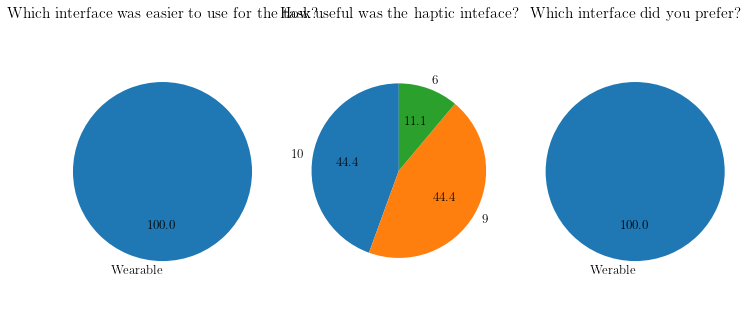

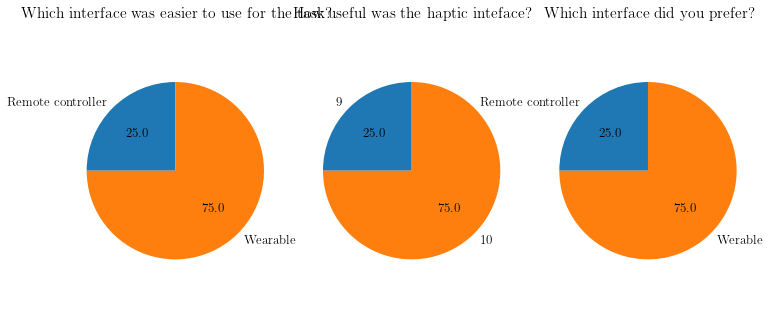

In [11]:
def plot_pies(data):
    
    plt.figure(figsize = (12,12))

    gender_pie_data = Counter(data[gender])
    easier_pie_data = Counter(data[easier])
    haptics_useful_pie_data = Counter(data[haptics])
    prefered_pie_data = Counter(data[prefered])

#     ax1 = plt.subplot(221)
#     ax1.pie(gender_pie_data.values(), labels=gender_pie_data.keys(), autopct='%1.1f%%', startangle=90)
#     ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
#     ax1.set_title(gender)

    ax1 = plt.subplot(231)
    ax1.pie(easier_pie_data.values(), labels=easier_pie_data.keys(), autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title(easier)

    ax1 = plt.subplot(232)
    ax1.pie(haptics_useful_pie_data.values(), labels=haptics_useful_pie_data.keys(), autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title(haptics)

    ax1 = plt.subplot(233)
    ax1.pie(prefered_pie_data.values(), labels=prefered_pie_data.keys(), autopct='%1.1f%%', startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax1.set_title(prefered)

    plt.show()
    
plot_pies(data_sim)
plot_pies(data_hw)

In [12]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 16 13:02:17 2018

@author: macchini
"""

import os,sys
sys.path.insert(1, os.path.join(sys.path[0], '..'))

import my_plots
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import utils

from numpy.random import seed
from numpy.random import randn
from scipy.stats import kruskal

from statistics import print_p

## Load file and create dataframe

In [13]:
folder = './Data'

files = os.listdir(folder)

csv_1 = 'NASA_TLX_haptics_1.csv'
csv_2 = 'NASA_TLX_haptics_2.csv'
csv_3 = 'NASA_TLX_haptics_3.csv'

In [14]:
answers_df_1 = pd.read_csv(os.path.join(folder, csv_1))
answers_df_2 = pd.read_csv(os.path.join(folder, csv_2))
answers_df_3 = pd.read_csv(os.path.join(folder, csv_3))

answers_df = pd.concat([answers_df_1, answers_df_2, answers_df_3])


# Separate hardware and simulation experiments
answers_df_hw = answers_df[answers_df['subject number'] >= 100]
answers_df = answers_df[answers_df['subject number'] < 100]

## Separate dataframe depending on interface/run

In [15]:
types = ['remote', 'motion']

# Separate answers depending on interface and run
answers = {}
answers[types[0]] = answers_df[answers_df['Interface'] == 'Remote']
answers[types[1]] = answers_df[answers_df['Interface'] == 'Motion']

answers_hw = {}
answers_hw[types[0]] = answers_df_hw[answers_df_hw['Interface'] == 'Remote']
answers_hw[types[1]] = answers_df_hw[answers_df_hw['Interface'] == 'Motion']

## Separate questions

In [16]:
data = {}
data_hw_NASA = {}

mentally_demanding = 'How mentally demanding was the test?'
physically_demanding = 'How physically demanding was the test?'
pace = 'How hurried or rushed was the pace of the task?'
successful = 'How successful were you in accomplishing what you were asked to do?'
insecure = 'How insecure, discouraged, irritated, stresses, and annoyed were you?'

questions = [mentally_demanding, physically_demanding, pace, successful, insecure]

for i in types:
    data[i] = {}
    data_hw_NASA[i] = {}
    for q in questions:
        data[i][q] = answers[i][q].values
        data_hw_NASA[i][q] = answers_hw[i][q].values

## Compute mean and average

In [17]:
stats = {}
stats_hw = {}

mean_index = 0
std_index = 1

for i in types:
    stats[i] = {}
    stats_hw[i] = {}
    for q in questions:
        stats[i][q] = [0, 0]
        stats[i][q][mean_index] = np.mean(data[i][q])
        stats[i][q][std_index] = np.std(data[i][q])
        
        stats_hw[i][q] = [0, 0]
        stats_hw[i][q][mean_index] = np.mean(data_hw_NASA[i][q])
        stats_hw[i][q][std_index] = np.std(data_hw_NASA[i][q])
        
print(stats)

{'remote': {'How mentally demanding was the test?': [2.357142857142857, 0.8949974347244047], 'How physically demanding was the test?': [1.2142857142857142, 0.410325903324145], 'How hurried or rushed was the pace of the task?': [1.3214285714285714, 0.6575697371257846], 'How successful were you in accomplishing what you were asked to do?': [2.5357142857142856, 0.7310531960878115], 'How insecure, discouraged, irritated, stresses, and annoyed were you?': [1.75, 1.0220777158038703]}, 'motion': {'How mentally demanding was the test?': [2.0, 0.9837387536759294], 'How physically demanding was the test?': [1.5806451612903225, 0.7523808896574581], 'How hurried or rushed was the pace of the task?': [1.3548387096774193, 0.8249491517770594], 'How successful were you in accomplishing what you were asked to do?': [3.870967741935484, 0.7509965630208268], 'How insecure, discouraged, irritated, stresses, and annoyed were you?': [1.096774193548387, 0.29565004483586066]}}


## Results

Stats (similarly for stats_hw for the hardware experiments) is a nested dictionnary containing the mean and std for each question of the survey, separated depending on the interface (remote or motion) and run (first or last)

data (similarly data_hw_NASA) can be used to create boxplot for the distribution of answers.

In [18]:
def t_test_kruskal(X, Y):
    
    # Kruskal-Wallis H-test
    
    # seed the random number generator
    seed(1)
    
    # compare samples
    stat, p = kruskal(X, Y)
    
    return [stat, p]

In [19]:
for idx,i in enumerate(types):
    print()
    for j in types[idx+1:]:
        print()
        for q in questions:
            if i != j:
                # also, compare only first-last for same interface or first-first, last-last for different ones

                t, p = t_test_kruskal(data[i][q],data[j][q])
                print(i,j,q)
                print_p(p)



remote motion How mentally demanding was the test?
p = 0.12542957764898166
remote motion How physically demanding was the test?
p = 0.04031242700616708 !!!!!!
remote motion How hurried or rushed was the pace of the task?
p = 0.5815264895493811
remote motion How successful were you in accomplishing what you were asked to do?
p = 1.0636481155072526e-07 !!!!!!!!!!
remote motion How insecure, discouraged, irritated, stresses, and annoyed were you?
p = 0.002324042856445646 !!!!!!!!!!



### remote-first motion-first How physically demanding was the test? p =  0.0488888176268915
### remote-last motion-last How physically demanding was the test? p =  0.23390621098854886
### remote-last motion-last How mentally demanding was the test? p =  0.01913961955875495
### motion-first remote-first How mentally demanding was the test? p =  0.03344653009997241

remote
{'How mentally demanding was the test?': [2.357142857142857, 0.8949974347244047], 'How physically demanding was the test?': [1.2142857142857142, 0.410325903324145], 'How hurried or rushed was the pace of the task?': [1.3214285714285714, 0.6575697371257846], 'How successful were you in accomplishing what you were asked to do?': [2.5357142857142856, 0.7310531960878115], 'How insecure, discouraged, irritated, stresses, and annoyed were you?': [1.75, 1.0220777158038703]}
[2.357142857142857, 1.2142857142857142, 1.3214285714285714, 2.5357142857142856, 1.75]
[0.8949974347244047, 0.410325903324145, 0.6575697371257846, 0.7310531960878115, 1.0220777158038703]
motion
{'How mentally demanding was the test?': [2.0, 0.9837387536759294], 'How physically demanding was the test?': [1.5806451612903225, 0.7523808896574581], 'How hurried or rushed was the pace of the task?': [1.3548387096774193, 0.8249491517770594], 'How successful were you in accomplishing what you were asked to do?': [3.870967741

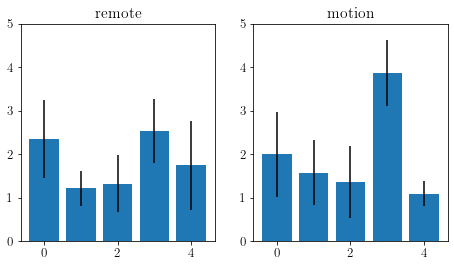

In [20]:
plt.figure(figsize=(16,4))

vals = []
errors = []

for idx, s in enumerate(stats):
    print(s)
    print(stats[s])
    
    means = [stats[s][q][0] for q in questions]
    stds = [stats[s][q][1] for q in questions]
    
    print(means)
    print(stds)
    
    ax = plt.subplot(141+idx)
    
    ax.bar([0, 1, 2, 3, 4],
       means,
       yerr=stds)
    plt.title(s)
    plt.ylim(0, 5)
#     vals.append(means[1])
#     stds.append(stds[1])
#     vals.append(means[3:5])
#     errors.append(stds[3:5])
    vals.append([means[1], means[3], means[4]])
    errors.append([stds[1], stds[3], stds[4]])
#     stds.append([stds[3:5]])
    
print(vals)
print(errors)

br


/Users/lis/Documents/github/Bidirectional_Interface/data_analysis/Surveys/../my_plots.py:58: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


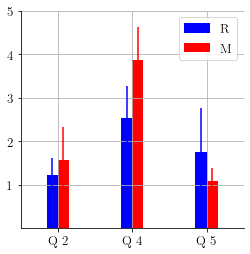

In [21]:
plt.figure(figsize=(4,4))
ax = plt.subplot(111)
my_plots.bar_multi(vals, errors, legend = ['R','M'], xlabels = ['Q 2', 'Q 4', 'Q 5'], xlim = [0.5,3.5], yticks = [1,2,3,4,5], w =0.15, save = True, where = 'hapt_NASA.pdf', colors = 'br')

# FINAL PLOTS

remote
{'How mentally demanding was the test?': [2.357142857142857, 0.8949974347244047], 'How physically demanding was the test?': [1.2142857142857142, 0.410325903324145], 'How hurried or rushed was the pace of the task?': [1.3214285714285714, 0.6575697371257846], 'How successful were you in accomplishing what you were asked to do?': [2.5357142857142856, 0.7310531960878115], 'How insecure, discouraged, irritated, stresses, and annoyed were you?': [1.75, 1.0220777158038703]}
[2.357142857142857, 1.2142857142857142, 1.3214285714285714, 2.5357142857142856, 1.75]
[0.8949974347244047, 0.410325903324145, 0.6575697371257846, 0.7310531960878115, 1.0220777158038703]
motion
{'How mentally demanding was the test?': [2.0, 0.9837387536759294], 'How physically demanding was the test?': [1.5806451612903225, 0.7523808896574581], 'How hurried or rushed was the pace of the task?': [1.3548387096774193, 0.8249491517770594], 'How successful were you in accomplishing what you were asked to do?': [3.870967741

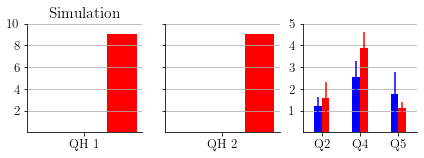

In [22]:
resp_data = {}

resp_data[easier] = Counter(data_sim[easier])
resp_data[prefered] = Counter(data_sim[prefered])

resp_data[easier]['Equivalent'] = 0
resp_data[easier]['Remote'] = 0
resp_data[prefered]['Equivalent'] = 0
resp_data[prefered]['Remote'] = 0

c1 = 'gray'
c2 = 'b'
c3 = 'r'

c = [c1, c2, c3]

qs = ['QH 1', 'QH 2']

fig = plt.figure(figsize = (7,2))
for jdx, j in enumerate(resp_data):
    
    ax = fig.add_subplot(1, 3, 1+jdx)

    options = []
    resp = []

    for i in sorted(resp_data[j]):
        options.append(i)
        resp.append(resp_data[j][i])

    for idx, i in enumerate(options):
        plt.bar(1+idx, resp[idx], label = i, color = c[idx])
        
    plt.yticks([2,4,6,8,10])
    if jdx==1:
        plt.yticks([2,4,6,8,10], ['','','','',''])
    if jdx==0:
        plt.title('Simulation')  

    plt.grid()    
    plt.ylim(0,10)
    plt.xticks([2], [qs[jdx]])
#     plt.ylabel('Responses')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.grid()
    

vals = []
errors = []

for idx, s in enumerate(stats):
    print(s)
    print(stats[s])
    
    means = [stats[s][q][0] for q in questions]
    stds = [stats[s][q][1] for q in questions]
    
    print(means)
    print(stds)
    
#     ax = plt.subplot(141+idx)
    
#     ax.bar([0, 1, 2, 3, 4],
#        means,
#        yerr=stds)
#     plt.title(s)
#     plt.ylim(0, 5)
#     vals.append(means[1])
#     stds.append(stds[1])
#     vals.append(means[3:5])
#     errors.append(stds[3:5])
    vals.append([means[1], means[3], means[4]])
    errors.append([stds[1], stds[3], stds[4]])
#     stds.append([stds[3:5]])

ax = fig.add_subplot(133)
my_plots.bar_multi(vals, errors, ax = ax, xlabels = ['Q2', 'Q4', 'Q5'], xlim = [0.5,3.5], yticks = [1,2,3,4,5], w =0.2, save = True, where = 'hapt.pdf', colors = 'br')
ax.xaxis.grid()
savefig('hapt.pdf', bbox_inches='tight')


resp_data[haptics] = Counter(data_sim[haptics])
hapt_resp = []
for i in resp_data[haptics]:
    hapt_resp.extend([i]*resp_data[haptics][i])
    
print(hapt_resp)

print(np.mean(hapt_resp))
print(np.std(hapt_resp))

0
1
2
0
1
2
remote
{'How mentally demanding was the test?': [3.4, 1.019803902718557], 'How physically demanding was the test?': [1.4, 0.48989794855663565], 'How hurried or rushed was the pace of the task?': [1.6, 0.48989794855663565], 'How successful were you in accomplishing what you were asked to do?': [3.1, 0.5385164807134505], 'How insecure, discouraged, irritated, stresses, and annoyed were you?': [2.2, 0.8717797887081347]}
[3.4, 1.4, 1.6, 3.1, 2.2]
[1.019803902718557, 0.48989794855663565, 0.48989794855663565, 0.5385164807134505, 0.8717797887081347]
motion
{'How mentally demanding was the test?': [2.111111111111111, 0.8748897637790901], 'How physically demanding was the test?': [1.5555555555555556, 0.4969039949999533], 'How hurried or rushed was the pace of the task?': [1.2222222222222223, 0.41573970964154905], 'How successful were you in accomplishing what you were asked to do?': [4.111111111111111, 0.5665577237325317], 'How insecure, discouraged, irritated, stresses, and annoyed

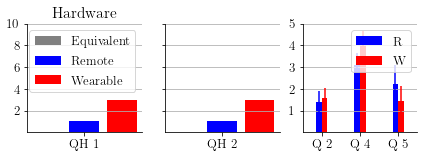

In [23]:
resp_data = {}

resp_data[easier] = Counter(data_hw_q[easier])
resp_data[prefered] = Counter(data_hw_q[prefered])

resp_data[easier]['Equivalent'] = 0
resp_data[easier]['Remote controller'] = 1
resp_data[easier]['Wearable'] = 3
resp_data[prefered]['Equivalent'] = 0
resp_data[prefered]['Remote controller'] = 1
resp_data[prefered]['Werable'] = 3

c1 = 'gray'
c2 = 'b'
c3 = 'r'

c = [c1, c2, c3]

qs = ['QH 1', 'QH 2']

fig = plt.figure(figsize = (7,2))
for jdx, j in enumerate(resp_data):
    
    ax = fig.add_subplot(1, 3, 1+jdx)

    options = []
    resp = []

    for i in sorted(resp_data[j]):
        options.append(i)
        resp.append(resp_data[j][i])

    for idx, i in enumerate(options):
        print(idx)
        lab = 'Remote' if 'Re' in i else i
        plt.bar(1+idx, resp[idx], label = lab, color = c[idx])
        
    plt.yticks([2,4,6,8,10])
    if jdx==0:
        plt.legend()
        plt.title('Hardware')  
    if jdx==1:
        plt.yticks([2,4,6,8,10], ['','','','',''])

    plt.grid()    
    plt.ylim(0,10)
    plt.xticks([2], [qs[jdx]])
#     plt.ylabel('Responses')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.grid()
###

vals = []
errors = []

for idx, s in enumerate(stats_hw):
    print(s)
    print(stats_hw[s])
    
    means = [stats_hw[s][q][0] for q in questions]
    stds = [stats_hw[s][q][1] for q in questions]
    
    print(means)
    print(stds)
    vals.append([means[1], means[3], means[4]])
    errors.append([stds[1], stds[3], stds[4]])

ax = fig.add_subplot(133)
my_plots.bar_multi(vals, errors, ax = ax, legend = ['R','W'], xlabels = ['Q 2', 'Q 4', 'Q 5'], xlim = [0.5,3.5], yticks = [1,2,3,4,5], w =0.15, save = True, where = 'hapt_HW.pdf', colors = 'br')
ax.xaxis.grid()
savefig('hapt_HW.pdf', bbox_inches='tight')

print(np.mean(hapt_resp))
print(np.std(hapt_resp))

In [24]:
print(resp_data)

{'Which interface was easier to use for the task?': Counter({'Wearable': 3, 'Remote controller': 1, 'Equivalent': 0}), 'Which interface did you prefer?': Counter({'Werable': 3, 'Remote controller': 1, 'Equivalent': 0})}


In [25]:
data_sim

{'Age': array([24, 27, 32, 27, 25, 29, 21, 31, 24]),
 'Gender': array(['Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male',
        'Male', 'Male'], dtype=object),
 'How experienced are you with the use of remote controllers?': array([ 9,  5,  3, 10,  3, 10, 10,  5, 10]),
 'How experienced are you with the use of remote controllers for controlling drones?': array([9, 2, 3, 1, 1, 8, 1, 1, 3]),
 'Which interface was easier to use for the task?': array(['Wearable', 'Wearable', 'Wearable', 'Wearable', 'Wearable',
        'Wearable', 'Wearable', 'Wearable', 'Wearable'], dtype=object),
 'How useful was the haptic inteface?': array([10,  9,  9, 10,  9, 10, 10,  6,  9]),
 'Which interface did you prefer?': array(['Werable', 'Werable', 'Werable', 'Werable', 'Werable', 'Werable',
        'Werable', 'Werable', 'Werable'], dtype=object),
 'Why?': array(['Gives a sense of depth',
        'It was nice to have the physical motion associated with the motion of your hand',
        "it was easi

In [26]:
data_sim

{'Age': array([24, 27, 32, 27, 25, 29, 21, 31, 24]),
 'Gender': array(['Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male',
        'Male', 'Male'], dtype=object),
 'How experienced are you with the use of remote controllers?': array([ 9,  5,  3, 10,  3, 10, 10,  5, 10]),
 'How experienced are you with the use of remote controllers for controlling drones?': array([9, 2, 3, 1, 1, 8, 1, 1, 3]),
 'Which interface was easier to use for the task?': array(['Wearable', 'Wearable', 'Wearable', 'Wearable', 'Wearable',
        'Wearable', 'Wearable', 'Wearable', 'Wearable'], dtype=object),
 'How useful was the haptic inteface?': array([10,  9,  9, 10,  9, 10, 10,  6,  9]),
 'Which interface did you prefer?': array(['Werable', 'Werable', 'Werable', 'Werable', 'Werable', 'Werable',
        'Werable', 'Werable', 'Werable'], dtype=object),
 'Why?': array(['Gives a sense of depth',
        'It was nice to have the physical motion associated with the motion of your hand',
        "it was easi

In [27]:
res = [9,10,10,10]

In [28]:
np.mean(res)

9.75

In [29]:
np.std(res)

0.4330127018922193

In [30]:
remote_exp =  [7, 7 ,7 ,9,   9, 5, 3, 10,3, 10, 10, 5, 10, 9,8, 10, 10, 8, 5, 5, 10, 7, 10, 5, 4, 8]

In [31]:
np.mean(remote_exp)

7.461538461538462

In [32]:
np.std(remote_exp)

2.3407883161081444